Importing the required Libraries

In [ ]:

##Importing all the necessary libraries
import chardet
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import sklearn
from sklearn.preprocessing import scale 

from sklearn.model_selection import train_test_split   #train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge #Ridge and Lasso Regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [35]:
##Igore Warnings

import warnings
warnings.filterwarnings("ignore")
my_file = os.path.join(r"train.csv")
rawdata = open(my_file, 'rb').readline()

my_encoding = chardet.detect(rawdata)
print("File encoding details are as follows:\n",my_encoding)

File encoding details are as follows:
 {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [36]:
##Read housing dataset as 'df'
file_path = r"train.csv"
df = pd.read_csv(file_path)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

Dataset Inspection

In [37]:
##Check shape of the dataset
total_records= df.shape[0]  #storing total no. of records in a variable
df.shape

(1460, 81)

In [38]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Data Cleansing

In [40]:
## Data Cleaning 

##Stripping off white_spaces from the column name(if any)
df = df.rename(columns= lambda x: x.strip(), inplace=False)

In [41]:
##Checking and dropping duplicated records(if any)
df = df.drop_duplicates()

In [43]:
##Check null values if any(column wise: missing value percentage)
missing_val_cols_prcnt = round(100*df.isnull().sum()/len(df.index),2)
missing = pd.DataFrame(missing_val_cols_prcnt[missing_val_cols_prcnt!=0])
missing

0
LotFrontage   17.74
Alley         93.77
MasVnrType    59.73
MasVnrArea     0.55
BsmtQual       2.53
BsmtCond       2.53
BsmtExposure   2.60
BsmtFinType1   2.53
BsmtFinType2   2.60
Electrical     0.07
FireplaceQu   47.26
GarageType     5.55
GarageYrBlt    5.55
GarageFinish   5.55
GarageQual     5.55
GarageCond     5.55
PoolQC        99.52
Fence         80.75
MiscFeature   96.30

In [44]:
#missing values dataframe (sorting values for graph)
my_cols = missing.index
vals = missing[0]
missing_df = pd.DataFrame({'features':my_cols,'percent':vals})
missing_df = missing_df.sort_values(by='percent', ascending=False)

In [45]:
##Inspecting null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns and their null value %
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Alley           93.77
MasVnrType      59.73
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [46]:
## Replace nulls with 'None' where null implies absence of feature 

cat_null_obj_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','Electrical']
for column in cat_null_obj_cols:
    df[column]= df[column].fillna('None')

In [20]:
##Removing categorical features that have more than 80% data associated to one single value.
def get_cols_imbal(data, prcnt):
    df1= data.copy()
    my_list= []
    cat_obj_cols = df1.select_dtypes(include=['object'])
    for col in (cat_obj_cols):
        if(df1[col].value_counts().max() > int(prcnt*len(df1.index)/100)):
            my_list.append(col)
    return my_list

##Removing the skewed data
columns_to_be_removed = get_cols_imbal(data=df, prcnt=80)  
print("Categorical object type columns removed:",columns_to_be_removed)
print("\nNumber of categorical object type columns removed: ", len(columns_to_be_removed),"\n")

##Dropping columns with skewed data (object type categorical variables)
df = df.drop(columns_to_be_removed, axis=1)
df.head()

Categorical object type columns removed: ['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Number of categorical object type columns removed:  24 



Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0   1          60       RL         65.0     8450      Reg    Inside   
1   2          20       RL         80.0     9600      Reg       FR2   
2   3          60       RL         68.0    11250      IR1    Inside   
3   4          70       RL         60.0     9550      IR1    Corner   
4   5          60       RL         84.0    14260      IR1       FR2   

  Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      CollgCr     2Story            7            5       2003          2003   
1      Veenker     1Story            6            8       1976          1976   
2      CollgCr     2Story            7            5       2001          2002   
3      Crawfor     2Story            7            5       1915          1970   
4      NoRidge     2Story            8            5       2000          2000   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  \
0      PConc       Gd           No          GLQ         706           0   
1     CBlock       Gd           Gd          ALQ         978           0   
2      PConc       Gd           Mn          GLQ         486           0   
3     BrkTil       TA           No          ALQ         216           0   
4      PConc       Gd           Av          GLQ         655           0   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856        Ex       856       854             0   
1        284         1262        Ex      1262         0             0   
2        434          920        Ex       920       866             0   
3        540          756        Gd       961       756             0   
4        490         1145        Ex      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             1          Gd             8           0        None     Attchd   
1             1          TA             6           1          TA     Attchd   
2             1          Gd             6           1          TA     Attchd   
3             1          Gd             7           1          Gd     Detchd   
4             1          Gd             9           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0          RFn           2         548           0           61   
1       1976.0          RFn           2         460         298            0   
2       2001.0          RFn           2         608           0           42   
3       1998.0          Unf           3         642           0           35   
4       2000.0          RFn           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272         

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [49]:
df.shape

(1460, 81)

In [50]:
##Recheck null values in the categorical columns (only object types).

cat_obj_null_cols = df.select_dtypes(include='object')   #Retaining only object types categorical columns
missing_cat_obj_null_prcnt = round(100*cat_obj_null_cols.isnull().sum()/len(cat_obj_null_cols.index),2)
missing_cat_obj_null_prcnt = missing_cat_obj_null_prcnt[missing_cat_obj_null_prcnt!=0]
missing_cat_obj_null_prcnt

Series([], dtype: float64)

In [51]:
##Creating a dataframe 'df_obj_cat' with object type categorical variables
obj_type_cat = df.select_dtypes(include='object').columns
df_obj_cat = df.loc[:,obj_type_cat]
df_obj_cat.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  None      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  None      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ        None     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y   None  None        None   
1          RFn         TA         TA          Y   None  None        None   
2          RFn         TA         TA          Y   None  None        None   
3          Unf         TA         TA          Y   None  None        None   
4          RFn         TA         TA          Y   None  None        None   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [52]:
df_obj_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [53]:
# Checking the number of numerical features and the number of categorical features
num_col = []
cat_col = []
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
print('There are', len(num_col) ,'numerical features in the dataset')
print('There are', len(cat_col), 'categorical features in the dataset')

There are 38 numerical features in the dataset
There are 43 categorical features in the dataset


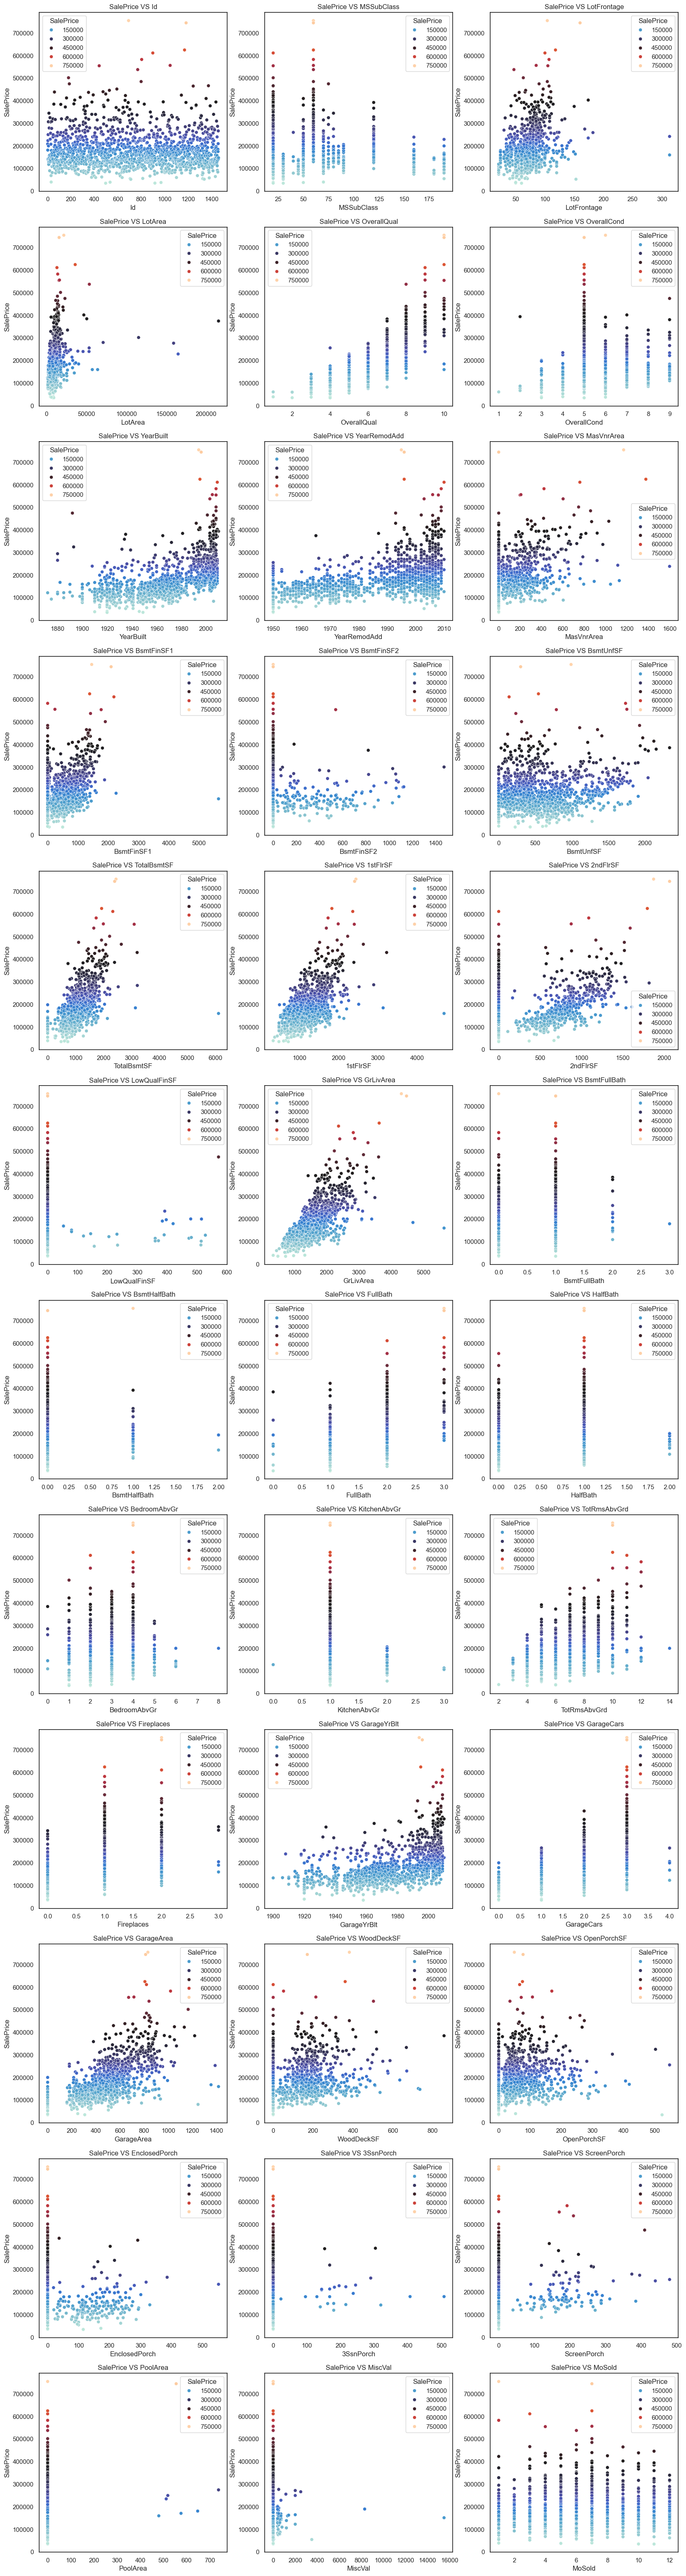

In [61]:
#Visualising numerical predictor variables with Target Variables
df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

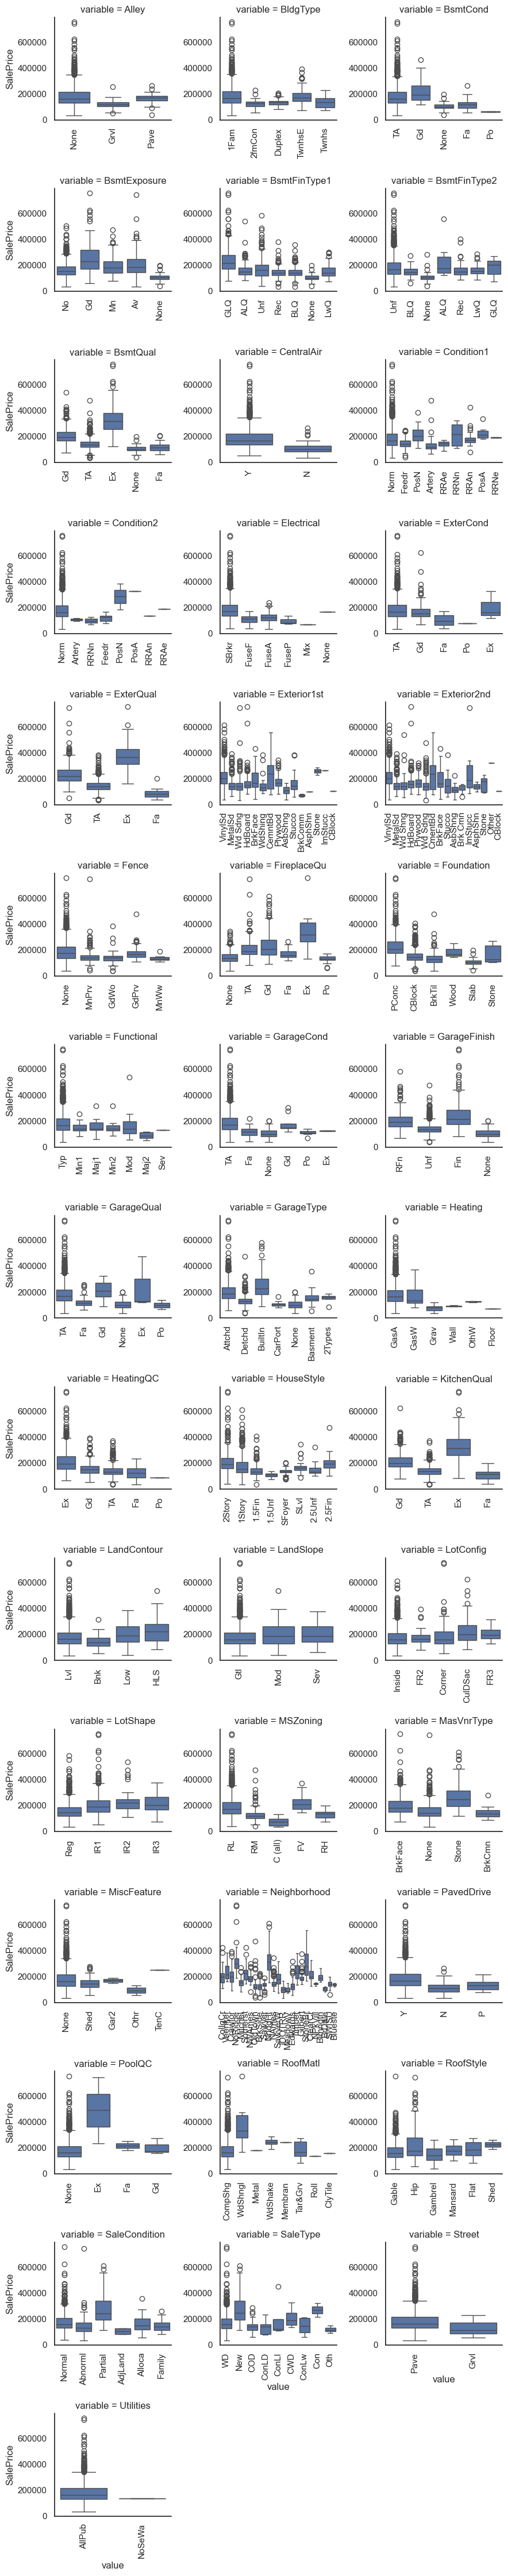

In [62]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

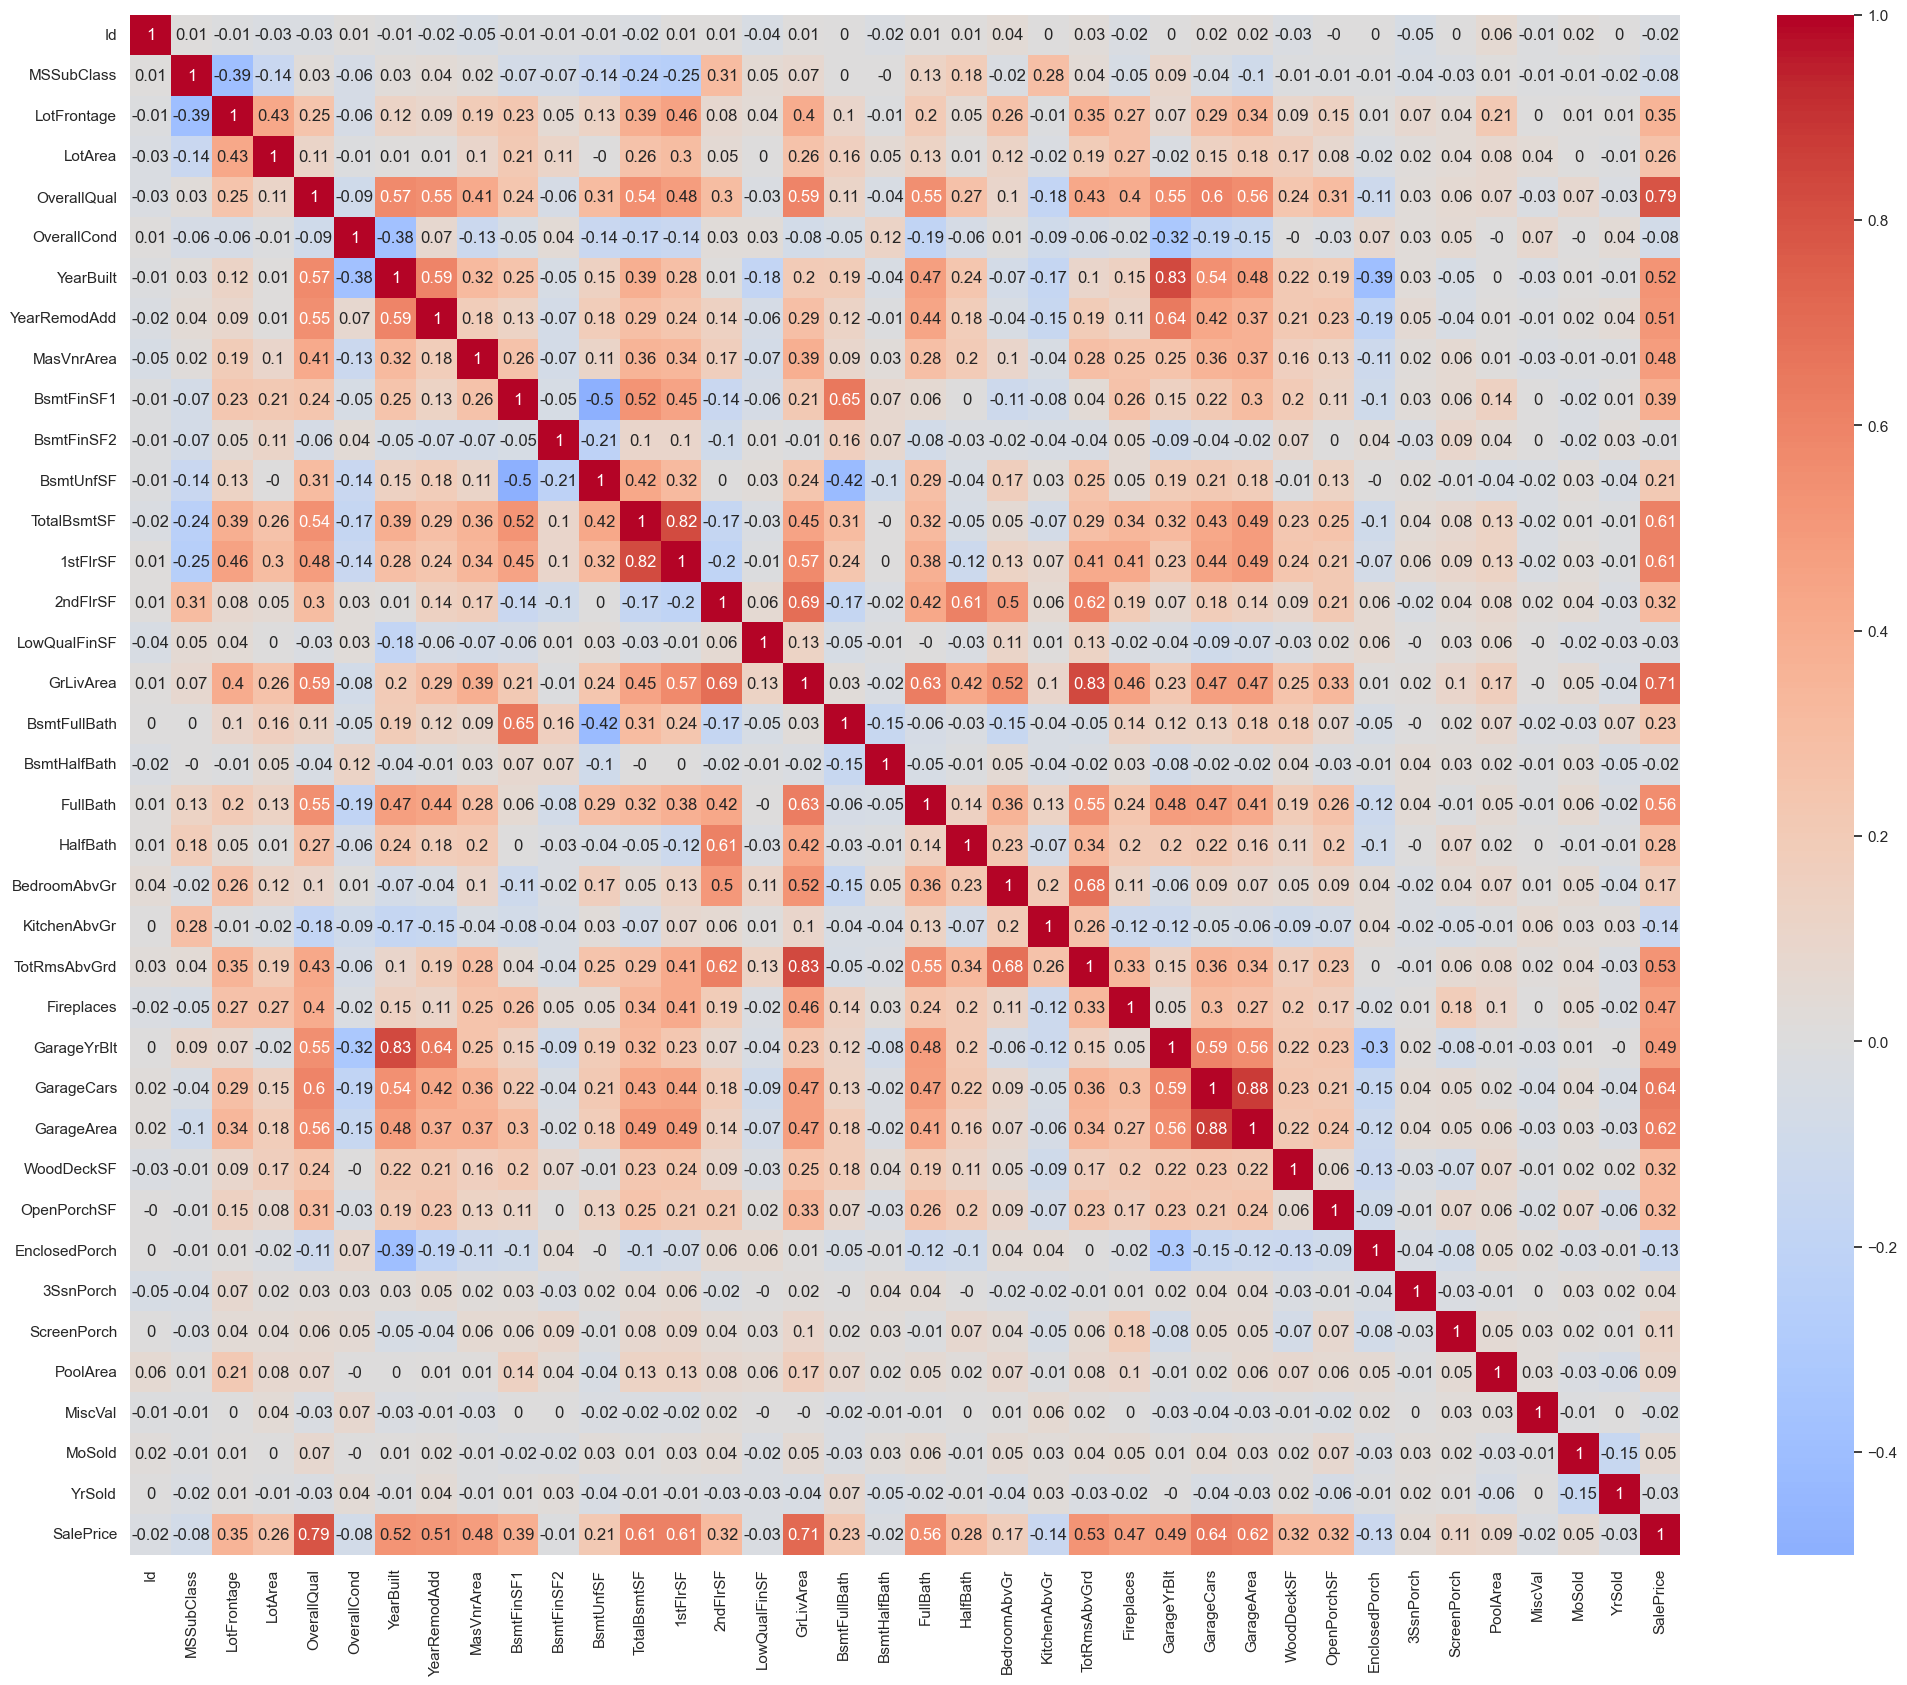

In [64]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

Data Preparation

In [65]:
## Data Preparation

# Creating a new Column to determine the age of the property
df['age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [67]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
df[['MSSubClass']] = df[['MSSubClass']].astype(str) 
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7    

In [68]:
#
#Handling missing values
#Instead of dropping rows or columns, we impute the NaN values with None, Default or similar values, since by intuion it is assumed that 
#when a certain feature is missing in that property, it is left blank during data collection
# getting list of columns with Null Values again
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

LotFrontage    17.74
garage_age      5.55
MasVnrArea      0.55
dtype: float64


In [71]:
#LotFrontage : Replacing Null value with the median of the neighbourhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [72]:
round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),5) > 0 ]

garage_age    5.54795
MasVnrArea    0.54795
dtype: float64

In [73]:
# Filling the Electrical 0.06% rows with the mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [74]:
round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)

garage_age       5.54795
MasVnrArea       0.54795
Id               0.00000
KitchenAbvGr     0.00000
GarageFinish     0.00000
GarageType       0.00000
FireplaceQu      0.00000
Fireplaces       0.00000
Functional       0.00000
TotRmsAbvGrd     0.00000
KitchenQual      0.00000
BedroomAbvGr     0.00000
GarageArea       0.00000
HalfBath         0.00000
FullBath         0.00000
BsmtHalfBath     0.00000
BsmtFullBath     0.00000
GrLivArea        0.00000
LowQualFinSF     0.00000
2ndFlrSF         0.00000
GarageCars       0.00000
GarageQual       0.00000
Electrical       0.00000
GarageCond       0.00000
age              0.00000
SalePrice        0.00000
SaleCondition    0.00000
SaleType         0.00000
YrSold           0.00000
MoSold           0.00000
MiscVal          0.00000
MiscFeature      0.00000
Fence            0.00000
PoolQC           0.00000
PoolArea         0.00000
ScreenPorch      0.00000
3SsnPorch        0.00000
EnclosedPorch    0.00000
OpenPorchSF      0.00000
WoodDeckSF       0.00000


In [75]:
#LotFrontage : Replacing Null value with the median of the neighbourhood
df['garage_age'] = df.groupby('garage_age')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [78]:
round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)

garage_age       5.54795
MasVnrArea       0.54795
Id               0.00000
KitchenAbvGr     0.00000
GarageFinish     0.00000
GarageType       0.00000
FireplaceQu      0.00000
Fireplaces       0.00000
Functional       0.00000
TotRmsAbvGrd     0.00000
KitchenQual      0.00000
BedroomAbvGr     0.00000
GarageArea       0.00000
HalfBath         0.00000
FullBath         0.00000
BsmtHalfBath     0.00000
BsmtFullBath     0.00000
GrLivArea        0.00000
LowQualFinSF     0.00000
2ndFlrSF         0.00000
GarageCars       0.00000
GarageQual       0.00000
Electrical       0.00000
GarageCond       0.00000
age              0.00000
SalePrice        0.00000
SaleCondition    0.00000
SaleType         0.00000
YrSold           0.00000
MoSold           0.00000
MiscVal          0.00000
MiscFeature      0.00000
Fence            0.00000
PoolQC           0.00000
PoolArea         0.00000
ScreenPorch      0.00000
3SsnPorch        0.00000
EnclosedPorch    0.00000
OpenPorchSF      0.00000
WoodDeckSF       0.00000


In [81]:
df['garage_age'] = df['GarageQual'].fillna(0)   #No Garage No Age
#NA = No Masonery Area
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [82]:
round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)

Id               0.0
GarageQual       0.0
GarageCars       0.0
GarageFinish     0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
GarageArea       0.0
GarageCond       0.0
Electrical       0.0
PavedDrive       0.0
garage_age       0.0
age              0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolQC           0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
1stFlrSF         0.0
CentralAir       0.0
MSSubClass       0.0
YearRemodAdd     0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType     

In [83]:
#Feature Engineering
print(df['Utilities'].value_counts())
print(df['Street'].value_counts())
print(df['PoolQC'].value_counts())

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
PoolQC
None    1453
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64


In [84]:
# Trying to remove redundant features
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [85]:
redundant_features = redundant_feature(df)
redundant_features

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [86]:
# Dropping these features since they have more than 99% of a single category and thus play no part in the prediction
df.drop(redundant_features,axis=1,inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [88]:
df.shape

(1460, 79)

In [89]:
# Removing outliers to make the model more robust
# From EDA we see that Living Area, Garage Area, Basement Area and Lot Area. Removing outliers from these. Other outliers will be handled 
# during power transform
def drop_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df = drop_outliers(df)
df.shape

(1455, 79)

In [90]:
#Creating some new features based on the existing features
#Vintage house with remodified version of it plays a important role in prediction(i.e. high price )
df['YrBltAndRemod']=df['YearBuilt']+df['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
#Creating derived column for total porch area 
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

In [91]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(df[cat_col])   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(cat_col,axis=1)     

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1455 entries, 0 to 1459
Columns: 335 entries, Id to garage_age_TA
dtypes: bool(296), float64(3), int64(36)
memory usage: 875.3 KB


In [93]:
df.shape

(1455, 335)

In [94]:
df.head()

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  MiscVal  SalePrice  age  remodel_age  YrBltAndRemod  \
0            0        0     208500    5            5           4006   
1            0        0     181500   31           31           3952   
2            0        0     223500    7            6           4003   
3            0        0     140000   91           36           3885   
4            0        0     250000    8            8           4000   

   Total_sqr_footage  Total_Bathrooms  Total_porch_sf  MSSubClass_120  \
0               2416              3.5              61           False   
1               2240              2.5             298           False   
2               2272              3.5              42           False   
3               1933              2.0             307           False   
4               2853              3.5             276           False   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0           False           False           False          False   
1           False           False           False           True   
2           False           False           False          False   
3           False           False           False          False   
4           False           False           False          False   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0          False          False          False          False           True   
1          False          False          False          False          False   
2          False          False          False          False           True   
3          False          False          False          False          False   
4          False   

In [95]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [97]:
# Checking co-related features
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(bool))  #To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

OverallQual           GarageCars               0.602025
                      YrBltAndRemod            0.628465
                      ExterQual_TA            -0.647338
YearBuilt             age                     -0.999036
                      YrBltAndRemod            0.931280
                      Foundation_PConc         0.651122
                      BsmtQual_TA             -0.632578
YearRemodAdd          remodel_age             -0.997926
                      YrBltAndRemod            0.845788
MasVnrArea            MasVnrType_None         -0.687465
BsmtFinSF1            BsmtFullBath             0.655652
                      Total_sqr_footage        0.693726
                      BsmtFinType1_Unf        -0.653551
BsmtFinSF2            BsmtFinType2_Unf        -0.715721
BsmtUnfSF             BsmtFinType1_Unf         0.602664
TotalBsmtSF           1stFlrSF                 0.806004
1stFlrSF              Total_sqr_footage        0.640512
2ndFlrSF              GrLivArea                0

In [98]:
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','YrBltAndRemod','Total_Bathrooms','MSSubClass_120','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','Alley_Grvl','Alley_None','LotShape_IR1','LandContour_Bnk','LotConfig_Corner',
        'LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Ex','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','PavedDrive_N','Fence_None','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','MiscFeature_Gar2','Foundation_PConc','garage_age_None'],
         axis=1,inplace=True)

In [99]:
# Chekcing the shape after dropping all co-related columns
X.shape

(1455, 236)

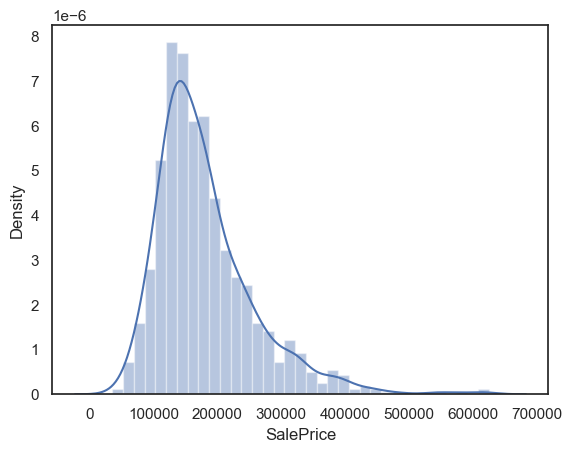

In [101]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

In [103]:
#Transforming the Target feature to make the data gaussian
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

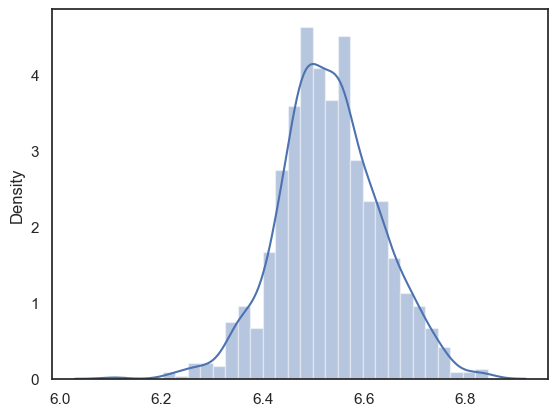

In [104]:
sns.distplot(y_train)
plt.show()

In [107]:
# Scaling the data using a Minmax Scaler
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [108]:
X_train.head()

Id  LotFrontage   LotArea  OverallCond  LowQualFinSF  BsmtFullBath  \
0  0.727023     0.068493  0.052116     0.428571           0.0           0.5   
1  0.902606     0.136986  0.128504     0.428571           0.0           0.5   
2  0.100823     0.150685  0.118124     0.428571           0.0           0.0   
3  0.796982     0.301370  0.106880     0.428571           0.0           0.0   
4  0.468450     0.236301  0.143217     0.428571           0.0           0.5   

   BsmtHalfBath  TotRmsAbvGrd  GarageArea  OpenPorchSF  EnclosedPorch  \
0           0.0      0.333333    0.418705     0.000000       0.307971   
1           0.0      0.555556    0.618705     0.083665       0.000000   
2           0.0      0.555556    0.312230     0.095618       0.000000   
3           0.0      0.222222    0.323741     0.000000       0.000000   
4           0.0      0.444444    0.505036     0.089641       0.000000   

   3SsnPorch  ScreenPorch  MiscVal       age  remodel_age  Total_sqr_footage  \
0        0.0          0.0      0.0  0.066176     0.150000           0.317574   
1        0.0          0.0      0.0  0.007353     0.016667           0.245317   
2        0.0          0.0      0.0  0.066176     0.150000           0.335638   
3        0.0          0.0      0.0  0.286765     0.650000           0.190901   
4        0.0          0.0      0.0  0.036765     0.083333           0.489964   

   Total_porch_sf  MSSubClass_180  MSSubClass_30  MSSubClass_40  \
0        0.182992             0.0            0.0            0.0   
1        0.230355             0.0            0.0            0.0   
2        0.206674             0.0            0.0            0.0   
3        0.000000             0.0            0.0            0.0   
4        0.325081             0.0            0.0            0.0   

   MSSubClass_70  MSZoning_C (all)  MSZoning_RH  MSZoning_RM  Alley_Pave  \
0            0.0               0.0          0.0          0.0         0.0   
1            0.0               0.0          0.0          0.0         0.0   
2            0.0               0.0          0.0          0.0         0.0   
3            0.0               0.0          0.0          0.0         0.0   
4            0.0               0.0          0.0          0.0         0.0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0           0.0           0.0           1.0              0.0              0.0   
1           0.0           0.0           0.0              0.0              0.0   
2           0.0           0.0           0.0              0.0              0.0   
3           0.0           0.0           1.0              0.0              0.0   
4           0.0           0.0           0.0              0.0              0.0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0              1.0                0.0            0.0            0.0   
1              1.0                0.0            0.0            0.0   
2              1.0                1.0            0.0            0.0   
3              1.0                0.0            0.0            0.0   
4              1.0                0.0            0.0            0.0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  \
0               1.0            0.0            0.0                   0.0   
1               1.0            0.0            0.0                   0.0   
2               0.0            0.0            0.0                   0.0   
3               1.0            0.0            0.0                   0.0   
4               0.0            0.0            0.0                   0.0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                

Fitting 11 folds for each of 28 candidates, totalling 308 fits


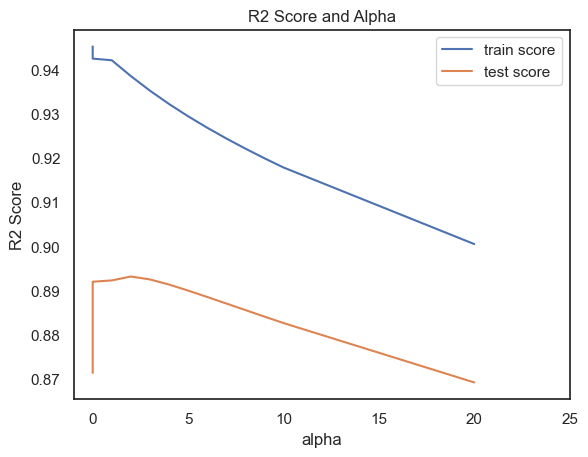

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is -84239748.43527584
The MSE of the model on the test dataset for optimum alpha is 901602.1160510916


In [109]:
## Ridge Regression

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [113]:
# Chekcing the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

Features     VIF
235         garage_age_TA     inf
173       Functional_Min2     inf
189      GarageFinish_RFn     inf
190      GarageFinish_Unf     inf
177        FireplaceQu_Ex     inf
176        Functional_Typ     inf
175        Functional_Sev     inf
174        Functional_Mod     inf
172       Functional_Min1     inf
110   Exterior1st_Wd Sdng     inf
171       Functional_Maj2     inf
202              MoSold_1     inf
203             MoSold_10     inf
204             MoSold_11     inf
205             MoSold_12     inf
206              MoSold_2     inf
111   Exterior1st_WdShing     inf
188      GarageFinish_Fin     inf
139      BsmtFinType1_ALQ     inf
178        FireplaceQu_Fa     inf
102   Exterior1st_CemntBd     inf
101    Exterior1st_CBlock     inf
100   Exterior1st_BrkFace     inf
99    Exterior1st_BrkComm     inf
98    Exterior1st_AsphShn     inf
97    Exterior1st_AsbShng     inf
106   Exterior1st_Plywood     inf
109   Exterior1st_VinylSd     inf
107     Exterior1st_Stone     inf
179        FireplaceQu_Gd     inf
180      FireplaceQu_None     inf
108    Exterior1st_Stucco     inf
181        FireplaceQu_Po     inf
182        FireplaceQu_TA     inf
105   Exterior1st_MetalSd     inf
103   Exterior1st_HdBoard     inf
207              MoSold_3     inf
212              MoSold_8     inf
217           YrSold_2009     inf
209              MoSold_5     inf
210              MoSold_6     inf
140      BsmtFinType1_BLQ     inf
141      BsmtFinType1_GLQ     inf
142      BsmtFinType1_LwQ     inf
211              MoSold_7     inf
213              MoSold_9     inf
146      BsmtFinType2_BLQ     inf
214           YrSold_2006     inf
148      BsmtFinType2_LwQ     inf
215           YrSold_2007     inf
143      BsmtFinType1_Rec     inf
147      BsmtFinType2_GLQ     inf
144      BsmtFinType1_Unf     inf
216           YrSold_2008     inf
218           YrSold_2010     inf
145      BsmtFinType2_ALQ     inf
208              MoSold_4     inf
149     BsmtFinType2_None     inf
233         garage_age_Gd     inf
232         garage_age_Fa     inf
234         garage_age_Po     inf
151      BsmtFinType2_Unf     inf
170       Functional_Maj1     inf
231         garage_age_Ex     inf
150      BsmtFinType2_Rec     inf
138       BsmtExposure_No  237.63
135       BsmtExposure_Av  136.90
136       BsmtExposure_Gd   86.38
137       BsmtExposure_Mn   77.52
50     Neighborhood_NAmes   57.55
54   Neighborhood_OldTown   41.16
43   Neighborhood_CollgCr   40.04
46   Neighborhood_Gilbert   30.15
45   Neighborhood_Edwards   29.13
58   Neighborhood_Somerst   27.69
53   Neighborhood_NridgHt   24.90
51    Neighborhood_NWAmes   21.27
56    Neighborhood_Sawyer   20.68
41   Neighborhood_BrkSide   20.41
14                    age   18.76
57   Neighborhood_SawyerW   18.32
49   Neighborhood_Mitchel   15.60
44   Neighborhood_Crawfor   14.43
47    Neighborhood_IDOTRR   13.01
52   Neighborhood_NoRidge   12.78

In [114]:
# Dropping cols with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Fitting 11 folds for each of 28 candidates, totalling 308 fits


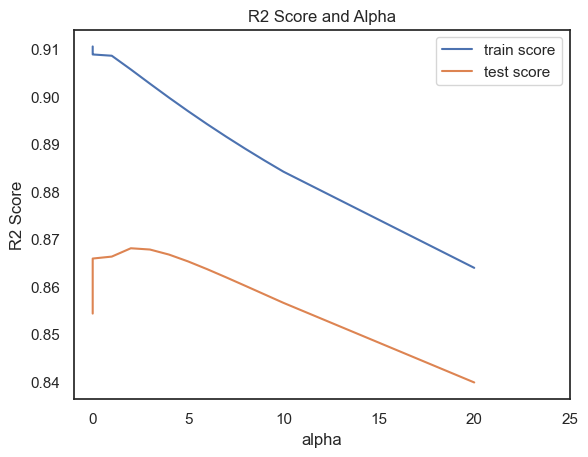

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is -78716865.99234965
The MSE of the model on the test dataset for optimum alpha is 842491.7491444385


In [115]:
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [116]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
Total_sqr_footage               0.168989
GarageArea                      0.101709
TotRmsAbvGrd                    0.067552
OverallCond                     0.047735
LotArea                         0.043913
CentralAir_Y                    0.032059
LotFrontage                     0.031778
Total_porch_sf                  0.031476
Neighborhood_StoneBr            0.028931
Alley_Pave                      0.024281
OpenPorchSF                     0.023247
MSSubClass_70                   0.023010
RoofMatl_WdShngl                0.022515
SaleType_Con                    0.022138
Neighborhood_Veenker            0.022095
HouseStyle_2.5Unf               0.021925
PavedDrive_P                    0.020276
KitchenQual_Ex                  0.019409
LandContour_HLS                 0.018716
SaleType_Oth                    0.018403

In [117]:
## Lasso Model

# Creating a model with an arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

The R2 Score of the model on the test dataset for 0.0001 alpha is -93018600.84132332
The MSE of the model on the test dataset for optimum alpha is 995560.5140621635


Fitting 11 folds for each of 11 candidates, totalling 121 fits


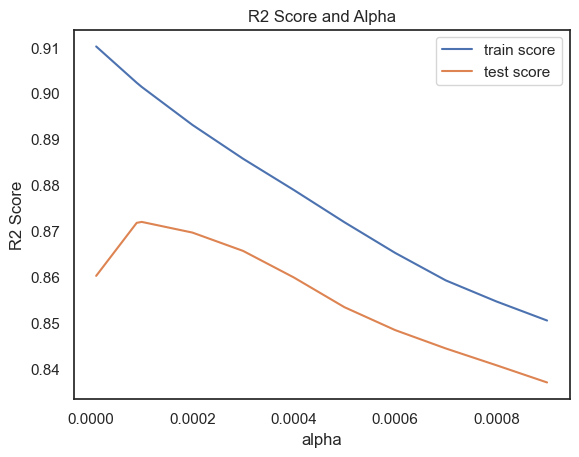

The optimum alpha is 0.0001
The R2 Score of the model on the test dataset for optimum alpha is -93018600.84132332
The MSE of the model on the test dataset for optimum alpha is 995560.5140621635


In [118]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [119]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)

Lasso Co-Efficient
Total_sqr_footage               0.202143
GarageArea                      0.110939
TotRmsAbvGrd                    0.063271
OverallCond                     0.046710
LotArea                         0.044541
CentralAir_Y                    0.033291
Total_porch_sf                  0.028854
Neighborhood_StoneBr            0.023269
Alley_Pave                      0.020867
OpenPorchSF                     0.020793
MSSubClass_70                   0.018907
LandContour_HLS                 0.017360
KitchenQual_Ex                  0.016812
BsmtQual_Ex                     0.016619
Condition1_Norm                 0.015546
Neighborhood_Veenker            0.014486
MasVnrType_Stone                0.014379
PavedDrive_P                    0.013628
LotFrontage                     0.013400
PavedDrive_Y                    0.012394

 Ridge Regression Model (FInal)

In [120]:
#The Final Ridge Regression Model is as follows:

ridge_final2

Ridge(alpha=2, random_state=100)

Lasso Regression Model (Final)

In [121]:
lasso_final2

Lasso(alpha=0.0001, random_state=100)


We've achieved an R2 score of approximately 0.82 on both the Ridge and Lasso models. These models indicate that the following factors have the most significant influence on house prices:

Total area in square feet
Total garage area
Total number of rooms
Overall condition of the property
Lot area
Whether the property is centrally air conditioned
Total porch area (including both open and enclosed areas)
Quality of the kitchen
Quality of the basement
In simpler terms, these factors are the key contributors to determining the price of a house according to our models.